- Nama Lengkap : Muhammad Farrel Mahendra
- NIM : 13317027
- Asal Universitas : Institut Teknologi Bandung
- Tanggal : 7 November 2020
- Sumber Dataset : [US Election 2020 Tweets](https://www.kaggle.com/manchunhui/us-election-2020-tweets)

In [193]:
# importing library
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
import re
import string
from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer
import geopandas as gpd

In [14]:
#load data
biden = pd.read_csv("hashtag_joebiden.csv", lineterminator='\n')
trump = pd.read_csv("hashtag_donaldtrump.csv", lineterminator='\n')

biden['data'] = 'biden'
trump['data'] = 'trump'

df = pd.concat([biden, trump])
df = df.reset_index()
del biden
del trump

# Dataset Information

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362377 entries, 0 to 810985
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   created_at            1362377 non-null  object 
 1   tweet_id              1362377 non-null  float64
 2   tweet                 1362377 non-null  object 
 3   likes                 1362377 non-null  float64
 4   retweet_count         1362377 non-null  float64
 5   source                1360958 non-null  object 
 6   user_id               1362377 non-null  float64
 7   user_name             1362345 non-null  object 
 8   user_screen_name      1362377 non-null  object 
 9   user_description      1219731 non-null  object 
 10  user_join_date        1362377 non-null  object 
 11  user_followers_count  1362377 non-null  float64
 12  user_location         946724 non-null   object 
 13  lat                   637519 non-null   float64
 14  long                  637519 non-nu

# Data Cleaning

In [18]:
# Before cleaning
df.tail(5)['tweet']

810981    MISMANAGED BALLOTS, Michigan Pennsylvania #Tru...
810982    TRUTH #Trump is a fraud, among many other trai...
810983    Vivement que Kamala Harris soit présidente ! #...
810984    What a deadbeat. He’s just going to humiliate ...
810985    Tem louco pra tudo! #JornalNacional #JornalNac...
Name: tweet, dtype: object

In [26]:
# Take only tweet from US
df = df[df['country'].isin(['United States of America', 'United States'])]

In [162]:
def emoji_cleaning(text):
    
    # Change emoji to text

    text = emoji.demojize(text).replace(":", " ")
    
    # Delete repeated emoji
    tokenizer = text.split()
    repeated_list = []
    
    for word in tokenizer:
        if word not in repeated_list:
            repeated_list.append(word)
    
    text = ' '.join(text for text in repeated_list)
    text = text.replace("_", " ").replace("-", " ")
    return text


def normalizer(text):
    # delete lowercase and newline
    text = text.strip().lower()
    text = re.sub(r'\n', '', text)
        # delete punctuation
    text = re.sub('[^a-z ]', ' ', text)
    
    # remove long word (more than 15)
    text = re.sub(r'\W*\b\w{15,}\b', ' ', text)
    
    #delete multiple space
    text = re.sub(' +', ' ', text).strip()
    
    for char in string.ascii_lowercase:
        char = char*3
        text = re.sub('{}+'.format(char), char[0], text)
    return text

df['tweet'] = df['tweet'].apply(emoji_cleaning)
df['tweet'] = df['tweet'].apply(normalizer)

lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
df['tweet'] = df['tweet'].apply(lemmatizer.lemmatize)

[nltk_data] Downloading package wordnet to /home/mahendra/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Wordcloud

In [163]:
# Find frequency every word
text = ' '.join(df['tweet'].to_list())
def word_count(str_):
    counts = dict()
    words = str_.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

count = word_count(text)
count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1], reverse=True)}
count

{'t': 274819,
 'trump': 269424,
 'co': 223288,
 'https': 207019,
 'the': 161123,
 'biden': 154544,
 'to': 118381,
 'a': 99878,
 's': 91619,
 'is': 91482,
 'and': 88643,
 'of': 84280,
 'joebiden': 84233,
 'in': 80108,
 'for': 73488,
 'election': 58710,
 'i': 57668,
 'you': 55836,
 'it': 55402,
 'vote': 54823,
 'he': 51531,
 'that': 50926,
 'this': 49390,
 'on': 46952,
 'with': 42639,
 'are': 35818,
 'not': 34623,
 'be': 33892,
 'we': 31539,
 'his': 30721,
 'will': 30214,
 'bidenharris': 29982,
 'amp': 29870,
 'if': 28187,
 'donaldtrump': 27834,
 'all': 26730,
 'have': 26136,
 'covid': 25681,
 'has': 24299,
 'they': 23844,
 'what': 23446,
 'as': 22279,
 'but': 21746,
 'about': 21714,
 'can': 21282,
 'from': 21163,
 'maga': 21144,
 'face': 21085,
 'president': 20944,
 'who': 20707,
 'by': 20491,
 'so': 20433,
 'out': 20025,
 'at': 19891,
 'just': 19406,
 'no': 19092,
 'was': 18483,
 'like': 18271,
 'people': 18230,
 'your': 18068,
 'up': 17668,
 'more': 17140,
 'or': 16912,
 'do': 16435,


In [164]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['trump', 'biden', 'https','joebiden','bidenharris', 'vote','president', 't', 'trump', 't', 
                  'trump', 'co', 'https', 'the', 'biden', 'to', 'a', 's', 'is', 'and', 'of', 'joebiden', 'in', 
                  'for', 'election', 'i', 'you', 'it', 'vote', 'he', 'that', 'this', 'on', 'with', 'are', 
                  'not', 'be', 'we', 'his', 'will', 'bidenharris', 'amp', 'if', 'donaldtrump', 'joe',
                  'kamalaharris', 'harris'])


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mahendra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


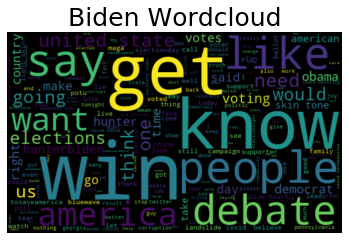

In [165]:
text = ' '.join(df[df.data=='biden']['tweet'].to_list())
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119, stopwords=stopwords).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title("Biden Wordcloud", size=25)
plt.axis('off')
plt.show()

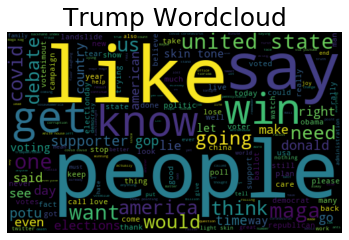

In [166]:
text = ' '.join(df[df.data=='trump']['tweet'].to_list())
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119,stopwords=stopwords).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title("Trump Wordcloud", size = 25)
plt.axis('off')
plt.show()

# Sentiment Analysis

In [167]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mahendra/nltk_data...


In [188]:
def sent(text):
    dict_ = sid.polarity_scores(text)
    return max(dict_, key=dict_.get)

sent_dict = {'pos':1, 'neg':-1, 'neu':0, 'compound':0}

In [191]:
df['sent'] = df['tweet'].apply(sent)
df['sent'] = df['sent'].apply(lambda x: sent_dict[x])

In [215]:
print("Biden Tweet Sentiment Score : {}".format(df[df.data=='biden']['sent'].sum()))
print("Trump Tweet Sentiment Score : {}".format(df[df.data=='trump']['sent'].sum()))

Biden Tweet Sentiment Score : -266
Trump Tweet Sentiment Score : -959


Text(0.5, 1.0, 'Trump Score per States')

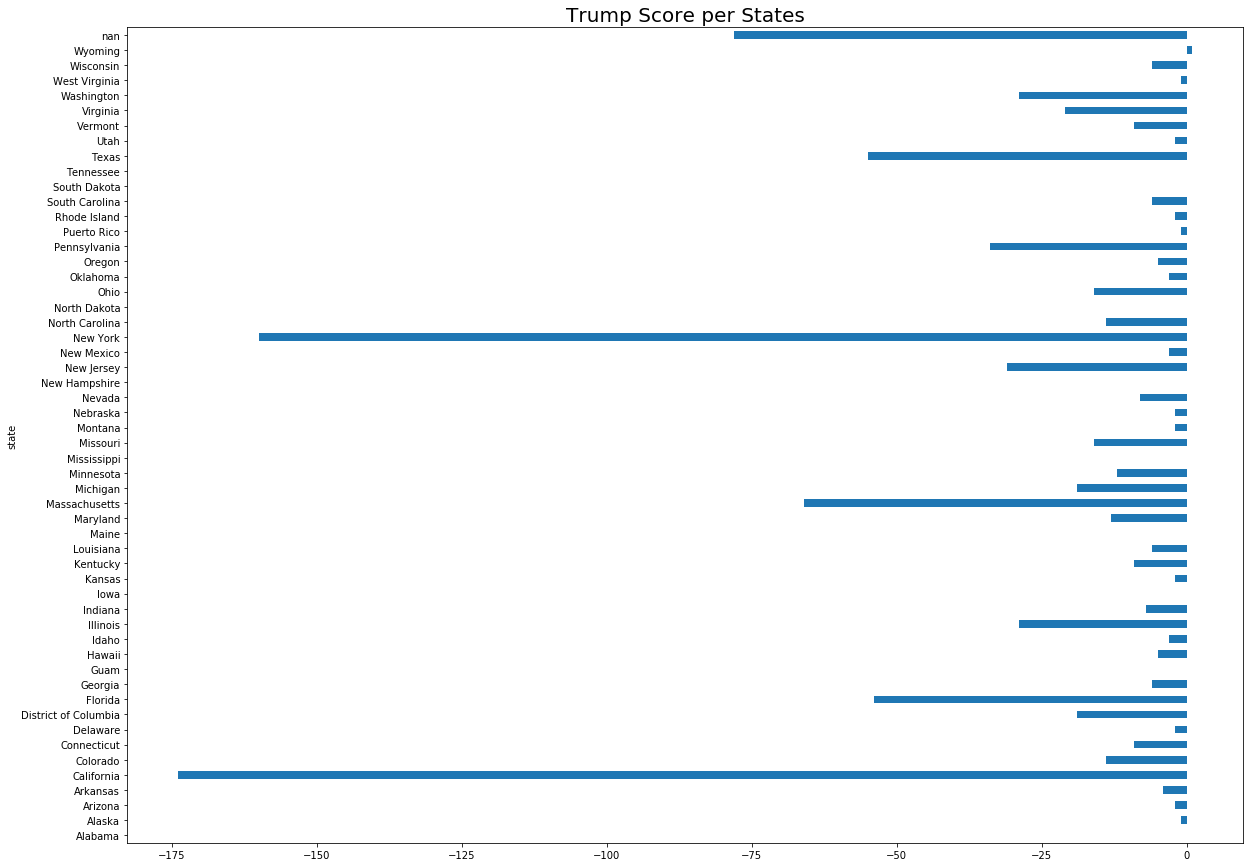

In [216]:
plt.figure(figsize=(20,15))
df[df.data=='trump'].groupby('state').sum()['sent'].plot.barh()
plt.title("Trump Score per States", size = 20)

Text(0.5, 1.0, 'Biden Score per States')

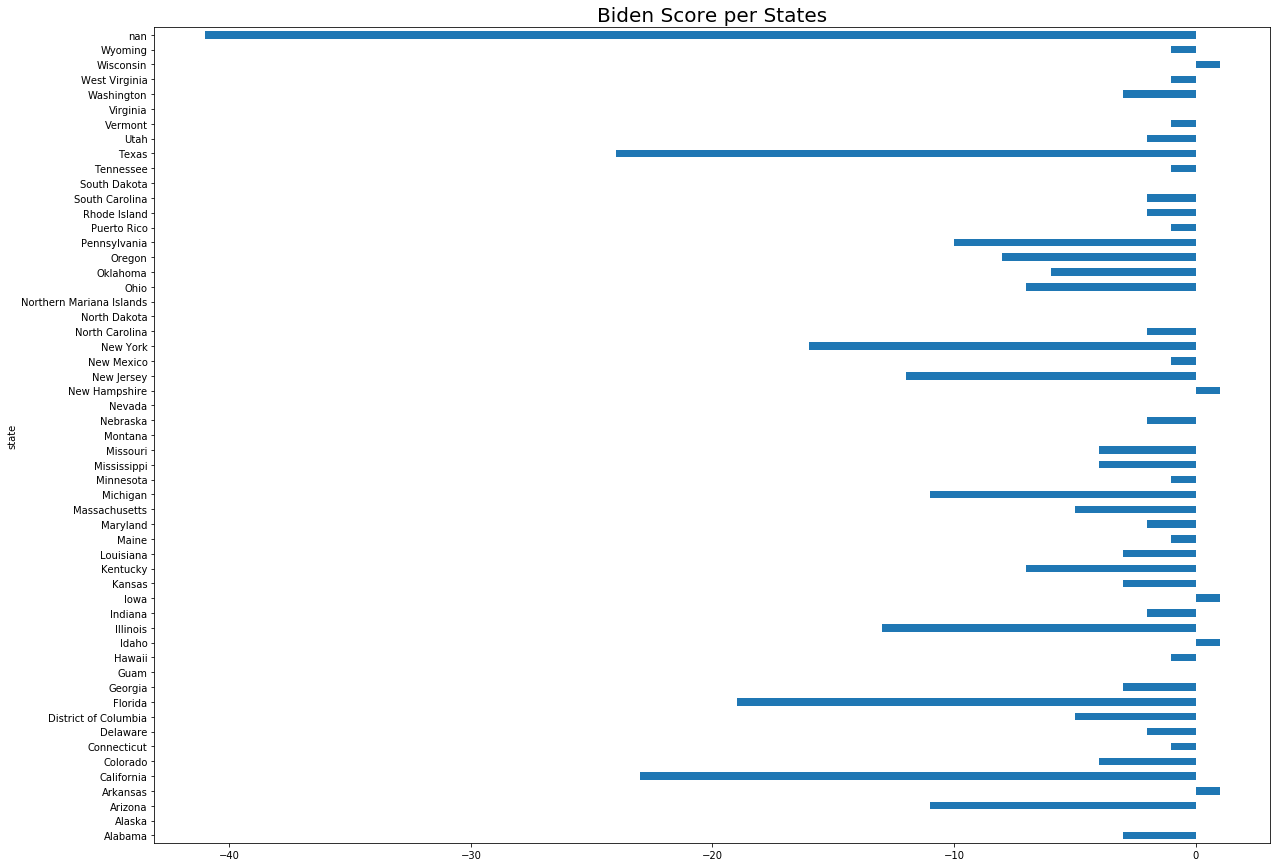

In [217]:
plt.figure(figsize=(20,15))
df[df.data=='biden'].groupby('state').sum()['sent'].plot.barh()
plt.title("Biden Score per States", size = 20)